# Conectando Colab con drive

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import os
os.chdir('/content/drive/My Drive/Programacion/Python/Machine Learning avanzado/1.Introduccion al Deep Learning/Semana2')

# MNIST digits classification with Keras

We don't expect you to code anything here because you've already solved it with TensorFlow.

But you can appreciate how simpler it is with Keras.

We'll be happy if you play around with the architecture though, there're some tips at the end.

<img src="images/mnist_sample.png" style="width:30%">

In [56]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print("We're using TF", tf.__version__)
import keras
print("We are using Keras", keras.__version__)

import sys
sys.path.append("/content/drive/My Drive/Programacion/Python/Machine Learning avanzado/1.Introduccion al Deep Learning/Semana2")
import keras_utils
#from keras_utils import reset_tf_session

We're using TF 2.3.0
We are using Keras 2.4.3


# Look at the data

In this task we have 50000 28x28 images of digits from 0 to 9.
We will train a classifier on this data.

In [3]:
import preprocessed_mnist
X_train, y_train, X_val, y_val, X_test, y_test = preprocessed_mnist.load_dataset_from_file()

X_train [shape (50000, 28, 28)] sample patch:
 [[0.         0.29803922 0.96470588 0.98823529 0.43921569]
 [0.         0.33333333 0.98823529 0.90196078 0.09803922]
 [0.         0.33333333 0.98823529 0.8745098  0.        ]
 [0.         0.33333333 0.98823529 0.56862745 0.        ]
 [0.         0.3372549  0.99215686 0.88235294 0.        ]]
A closeup of a sample patch:


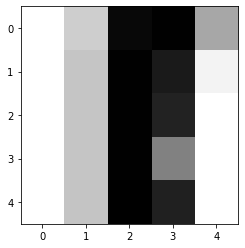

And the whole sample:


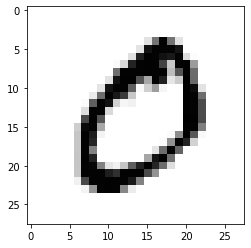

y_train [shape (50000,)] 10 samples:
 [5 0 4 1 9 2 1 3 1 4]


In [57]:
# X contains rgb values divided by 255
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
plt.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
plt.show()
print("And the whole sample:")
plt.imshow(X_train[1], cmap="Greys")
plt.show()
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])

In [58]:
# flatten images
X_train_flat = X_train.reshape((X_train.shape[0], -1))
print(X_train_flat.shape)

X_val_flat = X_val.reshape((X_val.shape[0], -1))
print(X_val_flat.shape)

(50000, 784)
(10000, 784)


In [59]:
# one-hot encode the target
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:3], y_train[:3])

(50000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] [5 0 4]


In [75]:
# building a model with keras
from keras.layers import Dense, Activation
from keras.models import Sequential

# we still need to clear a graph though
#s = reset_tf_session()

model = Sequential()  # it is a feed-forward network without loops like in RNN
model.add(Dense(256,input_shape=(784,))) # the first layer must specify the input shape (replacing placeholders)
model.add(Activation('sigmoid'))
model.add(Dense(256)
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [76]:
# you can look at all layers and parameter count
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_33 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_34 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_35 (Activation)   (None, 10)                0         
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_______________________________________________

In [77]:
# now we "compile" the model specifying the loss and optimizer
model.compile(
    loss='categorical_crossentropy', # this is our cross-entropy
    optimizer='adam',
    metrics=['accuracy']  # report accuracy during training
)

In [78]:
# and now we can fit the model with model.fit()
# and we don't have to write loops and batching manually as in TensorFlow
model.fit(
    X_train_flat, 
    y_train_oh,
    batch_size=512, 
    epochs=40,
    validation_data=(X_val_flat, y_val_oh),
    callbacks=early_stopping_cb,
    verbose=1
)

Epoch 1/40
98/98 [==============================] - 2s 20ms/step - loss: 9.9692 - accuracy: 0.5560 - val_loss: 2.5312 - val_accuracy: 0.7169
Epoch 2/40
98/98 [==============================] - 2s 17ms/step - loss: 1.7843 - accuracy: 0.6963 - val_loss: 1.4526 - val_accuracy: 0.7336
Epoch 3/40
98/98 [==============================] - 2s 18ms/step - loss: 1.3441 - accuracy: 0.7652 - val_loss: 1.2211 - val_accuracy: 0.8205
Epoch 4/40
98/98 [==============================] - 2s 17ms/step - loss: 1.1664 - accuracy: 0.8150 - val_loss: 1.0704 - val_accuracy: 0.8615
Epoch 5/40
98/98 [==============================] - 2s 17ms/step - loss: 1.0435 - accuracy: 0.8483 - val_loss: 0.9724 - val_accuracy: 0.8660
Epoch 6/40
98/98 [==============================] - 2s 17ms/step - loss: 0.9530 - accuracy: 0.8642 - val_loss: 0.8939 - val_accuracy: 0.8774
Epoch 7/40
98/98 [==============================] - 2s 18ms/step - loss: 0.8852 - accuracy: 0.8737 - val_loss: 0.8306 - val_accuracy: 0.8940
Epoch 8/40
98

# Here're the notes for those who want to play around here

Here are some tips on what you could do:

 * __Network size__
   * More neurons, 
   * More layers, ([docs](https://keras.io/))

   * Other nonlinearities in the hidden layers
     * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.


 * __Early Stopping__
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum
     

 * __Faster optimization__
   * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs


 * __Regularize__ to prevent overfitting
   * Add some L2 weight norm to the loss function, theano will do the rest
     * Can be done manually or via - https://keras.io/regularizers/
   
   
 * __Data augmemntation__ - getting 5x as large dataset for free is a great deal
   * https://keras.io/preprocessing/image/
   * Zoom-in+slice = move
   * Rotate+zoom(to remove black stripes)
   * any other perturbations
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.

In [ ]:
# kernel_regularizer : Regularizador para aplicar una penalización en el núcleo o pesos de la capa
# bias_regularizer : Regularizador para aplicar una penalización en el sesgo o bias de la capa
# activity_regularizer : Regularizador para aplicar una penalización en la salida de la capa
# https://keras.io/api/layers/initializers/

In [86]:
# building a model with keras
from keras.layers import Dense, Activation
from keras.models import Sequential

# we still need to clear a graph though
#s = reset_tf_session()

model = Sequential()  # it is a feed-forward network without loops like in RNN
initializer = tf.keras.initializers.Zeros
model.add(Dense(256,
                kernel_initializer=initializer, # iniciamlizamos los pesos con unos
                input_shape=(784,))) # the first layer must specify the input shape (replacing placeholders)
model.add(Activation('tanh'))
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(10,kernel_regularizer=tf.keras.regularizers.l2(0.10),  # Penalizacion l1 con una fuerza de regularizacion 0.01
          activity_regularizer=tf.keras.regularizers.l2(0.10) # Penalización l2 con una fuerza de regularizacion 0.01
          ))
model.add(Activation('softmax'))

In [87]:
# you can look at all layers and parameter count
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_43 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_44 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_45 (Activation)   (None, 10)                0         
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_______________________________________________

In [88]:
# now we "compile" the model specifying the loss and optimizer
model.compile(
    loss='categorical_crossentropy', # this is our cross-entropy
    optimizer='rmsprop',
    metrics=['accuracy']  # report accuracy during training
)

In [89]:
# generando el callback 
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_cb = EarlyStopping(patience=10,# patience:cuantas iteraciones voy a esperar que baje mi perdida para detener el algoritmo
                                  verbose=1)

In [90]:
# and now we can fit the model with model.fit()
# and we don't have to write loops and batching manually as in TensorFlow
model.fit(
    X_train_flat, 
    y_train_oh,
    batch_size=512, 
    epochs=40,
    validation_data=(X_val_flat, y_val_oh),
    callbacks=early_stopping_cb,
    verbose=1
)

Epoch 1/40
98/98 [==============================] - 2s 22ms/step - loss: 2.8572 - accuracy: 0.7821 - val_loss: 2.0604 - val_accuracy: 0.8681
Epoch 2/40
98/98 [==============================] - 2s 19ms/step - loss: 1.7652 - accuracy: 0.8767 - val_loss: 1.5486 - val_accuracy: 0.9004
Epoch 3/40
98/98 [==============================] - 2s 19ms/step - loss: 1.4956 - accuracy: 0.9011 - val_loss: 1.4313 - val_accuracy: 0.9178
Epoch 4/40
98/98 [==============================] - 2s 19ms/step - loss: 1.4181 - accuracy: 0.9166 - val_loss: 1.3771 - val_accuracy: 0.9301
Epoch 5/40
98/98 [==============================] - 2s 19ms/step - loss: 1.3778 - accuracy: 0.9282 - val_loss: 1.3530 - val_accuracy: 0.9399
Epoch 6/40
98/98 [==============================] - 2s 19ms/step - loss: 1.3517 - accuracy: 0.9376 - val_loss: 1.3359 - val_accuracy: 0.9447
Epoch 7/40
98/98 [==============================] - 2s 19ms/step - loss: 1.3325 - accuracy: 0.9446 - val_loss: 1.3258 - val_accuracy: 0.9484
Epoch 8/40
98